In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
RESULTS_DIR2 = '/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/'

In [4]:
import glob
import cPickle as pickle

In [5]:
experiments = [
               'C.Figure1.direction', 
               ]
all_labels = {
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], 
              }

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

In [16]:
all_results = {}

for experiment in experiments:

    
    e_dir2 = os.path.join(RESULTS_DIR2, experiment)
    datasets = sorted(os.listdir(e_dir2))
    print datasets
            
            
    results2 = [None]*2
    classifiers2 = ['VGG19']
    for i,c in enumerate(classifiers2):

        results2[i] = []
        for d in datasets:
            
            if int(d) < 2:
                continue
            
            d_dir = os.path.join(e_dir2, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            MLAEs = []

            for s in stats_files:
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
                print c,s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    
                    MLAEs.append(stats['MLAE'])

            print MLAEs
            results2[i].append(MLAEs)
            
            
    print 'Loaded', experiment
            
    all_results[experiment] = results2
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

['0', '1', '10', '2']
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/10/VGG19/08_9_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/10/VGG19/07_9_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/10/VGG19/05_9_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/10/VGG19/06_9_noise.p
[0.70154781327398785, -0.25317326566190607, 1.3010841889213425, -0.31279499018384554]
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/2/VGG19/04_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/2/VGG19/02_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/2/VGG19/03_noise.p
VGG19 /n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/C.Figure1.direction/2/VGG19/01_noise.p
[0.90905695864533953, 0.88809727388874249, 1.2291438707453548, 0.93289118473150645]
Loaded C.Fig

In [17]:
all_results

{'C.Figure1.direction': [[[0.70154781327398785,
    -0.25317326566190607,
    1.3010841889213425,
    -0.31279499018384554],
   [0.90905695864533953,
    0.88809727388874249,
    1.2291438707453548,
    0.93289118473150645]],
  None]}

In [9]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

1 [[0.70154781327398785, -0.25317326566190607, 1.3010841889213425, -0.31279499018384554]]
[0.93562665735717609]
2 [[0.90905695864533953, 0.88809727388874249, 1.2291438707453548, 0.93289118473150645]]
[0.023357541564443581]


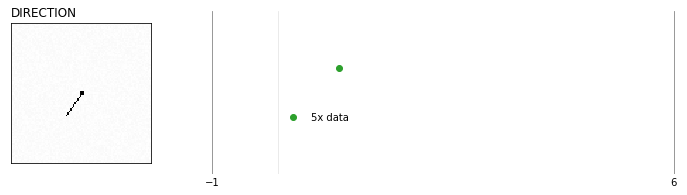

In [52]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

fig = plt.figure(figsize=(12,3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.3,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments


classifiers3 = ['Image', 'VGG19']
# image, mlp, lenet, vgg, xcp, vgg, xcp, dummy
#  0      1     2     3    4   5    6    7
# switch 4 and 5
# for exp
#        0     1     2     3    4   5   

all_results_fresh = dict(all_results)

# print all_results_fresh['C.Figure1.curvature'][3]

j = 0
for z,experiment in enumerate(experiments):
#     print classifiers3
#     print 'b4', all_results_fresh[experiment][3]
#     all_results_fresh[experiment][3], all_results_fresh[experiment][4] =  \
#         all_results_fresh[experiment][4], all_results_fresh[experiment][3]
#     print 'after', all_results_fresh[experiment][3]
    
    for i,c in enumerate(classifiers3):



        
        if i == 0:

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1
            
        errorbars = plt.errorbar(-100, 0, xerr=confidence, fmt='o', color=c_color)

            
#         print 'a', all_results_fresh[experiment][0]

        for which in [1,2]:

            data = [all_results_fresh[experiment][0][which-1]]
            print which, data

            # grab the MIDMEANS
            sorted_data = [sorted(r) for r in data]
    #         print sorted_data

            quarter = len(sorted_data[0]) / 4 # always floor

            data = [r[quarter:-quarter] for r in sorted_data]
    #         print data
#             data = sorted_data

            data = [d for d in data if len(d) != 0]

            y_pos = [i]


            means = [np.mean(r) for r in data]
            means = means[::-1] # we start counting from the bottom
    #         print 'aaa', means
            #
            # now bootstrapped CI
            #
    #         print data
    #         for f in data:
    #         means = [m for m in means if m != None]
            confidence = [1.96*bs.bootstrap(np.array(r), stat_func=bs_stats.std).value for r in data if len(r) != 0]
            print confidence
    #         confidence = [1.96*np.std(r) for r in data]
            confidence = confidence[::-1]



            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.get_yaxis().set_ticks([])
    #         labels = [labels[0]]

            ax.get_xaxis().set_ticks(np.arange(-1,7,7)) # mark the tange
            ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
            ax.tick_params(axis=u'both', which=u'both',length=0)



            # grid lines for X
            plt.grid(True, color='gray', which='major', axis='x', alpha=1)
            plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)


            c_color = 'C2'


            plt.xlim(-1,6.1)

            means = [means[0]]

            y_pos = [y_pos[0]]
            confidence = [confidence[0]]
    #         print y_pos, means
            errorbars = plt.errorbar(means, which, xerr=None, fmt='o', color=c_color, label=c)
        
            if which == 1:
                ax.annotate(xy=(0.5, 0.95), s='5x data')
    #         if i == 6:
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
errorbars = plt.errorbar(-100, 3, xerr=confidence, fmt='o', color=c_color)
plt.savefig('../PAPER/gfx/figure1_slim_only_direction.pdf', bbox_inches='tight', pad_inches=0)

1 [[0.70154781327398785, -0.25317326566190607, 1.3010841889213425, -0.31279499018384554]]
[0.93562665735717609]
2 [[0.90905695864533953, 0.88809727388874249, 1.2291438707453548, 0.93289118473150645]]
[0.023357541564443581]


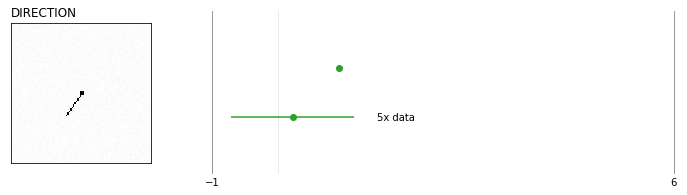

In [51]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

fig = plt.figure(figsize=(12,3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.3,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments


classifiers3 = ['Image', 'VGG19']
# image, mlp, lenet, vgg, xcp, vgg, xcp, dummy
#  0      1     2     3    4   5    6    7
# switch 4 and 5
# for exp
#        0     1     2     3    4   5   

all_results_fresh = dict(all_results)

# print all_results_fresh['C.Figure1.curvature'][3]

j = 0
for z,experiment in enumerate(experiments):
#     print classifiers3
#     print 'b4', all_results_fresh[experiment][3]
#     all_results_fresh[experiment][3], all_results_fresh[experiment][4] =  \
#         all_results_fresh[experiment][4], all_results_fresh[experiment][3]
#     print 'after', all_results_fresh[experiment][3]
    
    for i,c in enumerate(classifiers3):



        
        if i == 0:

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1
            
        errorbars = plt.errorbar(-100, 0, xerr=confidence, fmt='o', color=c_color)

            
#         print 'a', all_results_fresh[experiment][0]

        for which in [1,2]:

            data = [all_results_fresh[experiment][0][which-1]]
            print which, data

            # grab the MIDMEANS
            sorted_data = [sorted(r) for r in data]
    #         print sorted_data

            quarter = len(sorted_data[0]) / 4 # always floor

            data = [r[quarter:-quarter] for r in sorted_data]
    #         print data
#             data = sorted_data

            data = [d for d in data if len(d) != 0]

            y_pos = [i]


            means = [np.mean(r) for r in data]
            means = means[::-1] # we start counting from the bottom
    #         print 'aaa', means
            #
            # now bootstrapped CI
            #
    #         print data
    #         for f in data:
    #         means = [m for m in means if m != None]
            confidence = [1.96*bs.bootstrap(np.array(r), stat_func=bs_stats.std).value for r in data if len(r) != 0]
            print confidence
    #         confidence = [1.96*np.std(r) for r in data]
            confidence = confidence[::-1]



            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.get_yaxis().set_ticks([])
    #         labels = [labels[0]]

            ax.get_xaxis().set_ticks(np.arange(-1,7,7)) # mark the tange
            ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
            ax.tick_params(axis=u'both', which=u'both',length=0)



            # grid lines for X
            plt.grid(True, color='gray', which='major', axis='x', alpha=1)
            plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)


            c_color = 'C2'


            plt.xlim(-1,6.1)

            means = [means[0]]

            y_pos = [y_pos[0]]
            confidence = [confidence[0]]
    #         print y_pos, means
            errorbars = plt.errorbar(means, which, xerr=confidence, fmt='o', color=c_color, label=c)
        
            if which == 1:
                ax.annotate(xy=(1.5, 0.95), s='5x data')
    #         if i == 6:
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
errorbars = plt.errorbar(-100, 3, xerr=confidence, fmt='o', color=c_color)
plt.savefig('../PAPER/gfx/figure1_slim_only_direction_with_confidence.pdf', bbox_inches='tight', pad_inches=0)